In [1]:
import numpy as np
import pandas as pd
from random import random
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def activation(entrada):
    return 1 / (1 + np.exp(-entrada))


def d_sig(entrada): 
    return entrada * (1-entrada)
    

In [2]:
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')
mean = 0.1307

y_train = df_train.iloc[:, :1].values
x_train = df_train.iloc[:, 1:]
x_train = x_train.values/255
x_train = x_train - mean

y_test = df_test.iloc[:, :1].values
x_test = df_test.iloc[:,1:]
x_test = x_test.values/255
x_test = x_test - mean

In [3]:
epochs = 100
lr = 0.01
w_hidden = np.random.normal(0, 0.5, (30, 784))/10
w_output = np.random.normal(0, 0.5, (10, 30))/10

for i in range(epochs):

    for j in range(y_train.size): 
        
        hidden_layer = np.dot(w_hidden, x_train[j])
        hidden_a = activation(hidden_layer)
        output_layer = np.dot(w_output, hidden_a)
        output_a = activation(output_layer)

        target = np.zeros(10)
        target[y_train[j]] = 1

        output_error = target - output_a 
        hidden_error = np.dot(w_output.T, output_error)

        delta_output = lr * output_error * d_sig(output_a)
        delta_output = np.outer(delta_output, hidden_a)
        w_output = w_output + delta_output
        
        delta_hidden = lr * hidden_error * d_sig(hidden_a)
        delta_hidden = np.outer(delta_hidden, x_train[j])
        w_hidden = w_hidden + delta_hidden

In [4]:
erro = 0
lista_predicts = []
for i in range(y_test.size):
    
    hidden_layer = np.dot(w_hidden, x_test[i])
    hidden_a = activation(hidden_layer)
    output_layer = np.dot(w_output, hidden_a)
    output_a = activation(output_layer)
    predict = np.argmax(output_a)
    lista_predicts.append(predict)
    if predict != y_test[i]:
        erro += 1

print("A taxa foi de {}%".format(100-(erro*100/y_test.size)))

A taxa foi de 95.44954495449545%


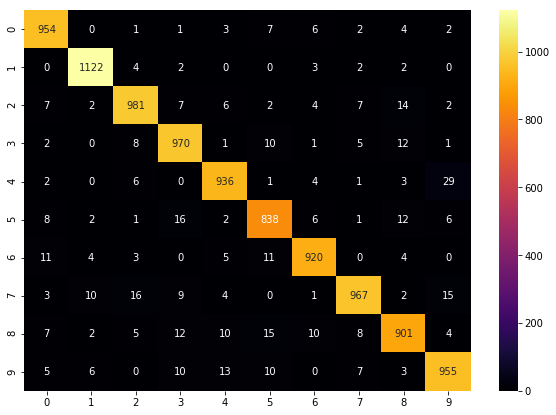

In [5]:
array = confusion_matrix(y_test, lista_predicts)
df_cm = pd.DataFrame(array, index = [i for i in'0123456789'], columns = [i for i in '0123456789'])
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot = True, cmap="inferno", fmt= "d")